In [1]:
pip install breeze-connect==1.0.57

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for python-socketio[client] from https://files.pythonhosted.org/packages/7e/9a/52b94c8c9516e07844d3da3d0da3e68649f172aeeace8d7a1becca9e6111/python_socketio-5.11.4-py3-none-any.whl.metadata
  Obtaining dependency information for bidict>=0.21.0 from https://files.pythonhosted.org/packages/99/37/e8730c3587a65eb5645d4aba2d27aae48e8003614d6aaf15dda67f702f1f/bidict-0.23.1-py3-none-any.whl.metadata
  Obtaining dependency information for python-engineio>=4.8.0 from https://files.pythonhosted.org/packages/ad/38/4642c75241686c9cf05d23c50b9ffbd760507292f12fdfb04adc2ab5d34a/python_engineio-4.9.1-py3-none-any.whl.metadata
  Obtaining dependency information for simple-websocket>=0.10.0 from https://files.pythonhosted.org/packages/6d/ea/288a8ac1d9551354488ff60c0ac6a76acc3b6b60f0460ac1944c75e240da/simple_websocket-1.0.0-py3-none-any.whl.metadata
  Obtaining dependenc

In [4]:
pip install redis

  Obtaining dependency information for redis from https://files.pythonhosted.org/packages/fd/d6/37ba7502c5144c93e2e63c81fbfd69c8b97c275328eb85734ce996d3dc13/redis-5.1.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/261.2 kB ? eta -:--:--
   --------- ------------------------------ 61.4/261.2 kB 1.6 MB/s eta 0:00:01
   ------------------ --------------------- 122.9/261.2 kB 1.4 MB/s eta 0:00:01
   ----------------------------- ---------- 194.6/261.2 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 261.2/261.2 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install pandas-market-calendars

  Obtaining dependency information for pandas-market-calendars from https://files.pythonhosted.org/packages/ab/e4/588a15467222602a5ca02d52700c3e3039f5f4fcce586a17f6ee0f6ba832/pandas_market_calendars-4.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for exchange-calendars>=3.3 from https://files.pythonhosted.org/packages/7e/8f/f3303c61b8e925ded53f37b3bb3365e349449ef40b687e39cd7b59f87d14/exchange_calendars-4.5.6-py3-none-any.whl.metadata
  Obtaining dependency information for pyluach from https://files.pythonhosted.org/packages/4f/83/2e585d06d49e0320050b3d7d8ae0dfbd1459e976ff9f4b4d8bcca983d474/pyluach-2.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for korean-lunar-calendar from https://files.pythonhosted.org/packages/9c/96/30f3fe51b336bb6da4714f4fdad7bbdce8f13af79af2eb75e22908f3f9f4/korean_lunar_calendar-0.3.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/107.3 kB ? eta -:--:--
   ---------------------- ----------------- 61

In [ ]:
from breeze_connect import BreezeConnect

api_key = 
secret_key = 
session_key = 

# Initialize SDK
breeze = BreezeConnect(api_key=api_key)

# Obtain your session key from https://api.icicidirect.com/apiuser/login?api_key=YOUR_API_KEY
# Incase your api-key has special characters(like +,=,!) then encode the api key before using in the url as shown below.
import urllib
print("https://api.icicidirect.com/apiuser/login?api_key="+urllib.parse.quote_plus(api_key))

# Generate Session
breeze.generate_session(api_secret=secret_key,
                        session_token=session_key)

https://api.icicidirect.com/apiuser/login?api_key=m618557921b90~%3D3283%246896zv8I34%406


In [84]:
import pandas as pd, numpy as np
from download import get_nifty50_expiry_dates
import pandas_market_calendars as mcal

In [65]:
mcal.get_calendar('NSE').schedule(pd.to_datetime("2020-01-01T07:00:00.000Z"),pd.to_datetime("2025-01-29T07:00:00.000Z"))

,market_open,market_close
2020-01-01,2020-01-01 03:45:00+00:00,2020-01-01 10:00:00+00:00
2020-01-02,2020-01-02 03:45:00+00:00,2020-01-02 10:00:00+00:00
2020-01-03,2020-01-03 03:45:00+00:00,2020-01-03 10:00:00+00:00
2020-01-06,2020-01-06 03:45:00+00:00,2020-01-06 10:00:00+00:00
2020-01-07,2020-01-07 03:45:00+00:00,2020-01-07 10:00:00+00:00
...,...,...
2025-01-23,2025-01-23 03:45:00+00:00,2025-01-23 10:00:00+00:00
2025-01-24,2025-01-24 03:45:00+00:00,2025-01-24 10:00:00+00:00
2025-01-27,2025-01-27 03:45:00+00:00,2025-01-27 10:00:00+00:00
2025-01-28,2025-01-28 03:45:00+00:00,2025-01-28 10:00:00+00:00


In [21]:
def download_futures_data(start,end,stock_code,frequency = "1minute"):
    
    working_days_df = mcal.get_calendar('NSE').schedule(pd.to_datetime(start),pd.to_datetime(end)+pd.DateOffset(months = 6))
    expiry_dates = get_nifty50_expiry_dates(pd.to_datetime(start).date(), pd.to_datetime(end).date(), list(working_days_df.index))
    final_data = pd.DataFrame()
    for expiry in expiry_dates:
        try:
            print(expiry)
            data = pd.DataFrame(breeze.get_historical_data_v2(interval = frequency,
                                        from_date = start,#pd.to_datetime(start),
                                        to_date = end,#pd.to_datetime(end),
                                        stock_code = stock_code,
                                        exchange_code = "NFO",
                                        product_type = "futures",
                                        expiry_date = expiry.strftime("%Y-%m-%d") + 'T07:00:00.000Z',
                                        right="others",
                                        strike_price="0")['Success'])
            
            final_data = pd.concat([final_data, data])
        except Exception as e:
            print(f"Error in downloading data for expiry: {expiry} - {e}")
            return final_data
    return final_data

In [129]:
def download_equity_data(start,end,stock_code,frequency = "1minute"):
    
    working_days_df = mcal.get_calendar('NSE').schedule(pd.to_datetime(start),pd.to_datetime(end))
    final_data = pd.DataFrame()
    for day in working_days_df.index:    
        if day.is_month_start:
            print(day)
        try:
            data = pd.DataFrame(breeze.get_historical_data_v2(interval = frequency,
                                        from_date = day.strftime("%Y-%m-%d") + 'T00:00:00.000Z',#pd.to_datetime(start),
                                        to_date = day.strftime("%Y-%m-%d") + 'T23:59:00.000Z',#pd.to_datetime(end),
                                        stock_code = stock_code,
                                        exchange_code = "NSE",
                                        product_type = "equity",
                                        right="others",
                                        strike_price="0")['Success'])
            final_data = pd.concat([final_data, data])
        except Exception as e:
            print(f"Error in downloading data for day: {day} - {e}")
            return final_data
    
    return final_data

In [22]:
futures = download_futures_data("2020-01-01T07:00:00.000Z","2025-01-29T07:00:00.000Z","NIFTY")

2020-01-30
2020-02-27
2020-03-26
2020-04-30
2020-05-28
2020-06-25
2020-07-30
2020-08-27
2020-09-24
2020-10-29
2020-11-26
2020-12-31
2021-01-28
2021-02-25
2021-03-25
2021-04-29
2021-05-27
2021-06-24
2021-07-29
2021-08-26
2021-09-30
2021-10-28
2021-11-25
2021-12-30
2022-01-27
2022-02-24
2022-03-31
2022-04-28
2022-05-26
2022-06-30
2022-07-28
2022-08-25
2022-09-29
2022-10-27
2022-11-24
2022-12-29
2023-01-25
2023-02-23
2023-03-29
2023-04-27
2023-05-25
2023-06-28
2023-07-27
2023-08-31
2023-09-28
2023-10-26
2023-11-30
2023-12-28
2024-01-25
2024-02-29
2024-03-28
2024-04-25
2024-05-30
2024-06-27
2024-07-25
2024-08-29
2024-09-26
2024-10-31
2024-11-28
2024-12-26
2025-01-30
2025-02-27
2025-03-27


In [88]:
# sec = pd.DataFrame(breeze.get_historical_data_v2(interval = "1second",
#                                         from_date = "2020-01-01T07:00:00.000Z",#pd.to_datetime(start),
#                                         to_date = "2020-01-01T09:30:00.000Z",#pd.to_datetime(end),
#                                         stock_code = "NIFTY",
#                                         exchange_code = "NFO",
#                                         product_type = "futures",
#                                         expiry_date = expiry_dates[1].strftime("%Y-%m-%d") + 'T07:00:00.000Z',
#                                         right="others",
#                                         strike_price="0")['Success'])
# min = pd.DataFrame(breeze.get_historical_data(interval = "1minute",
#                                         from_date = "2020-01-01T07:00:00.000Z",#pd.to_datetime(start),
#                                         to_date = "2025-01-29T07:00:00.000Z",#pd.to_datetime(end),
#                                         stock_code = "NIFTY",
#                                         exchange_code = "NFO",
#                                         product_type = "futures",
#                                         expiry_date = expiry_dates[1].strftime("%Y-%m-%d") + 'T07:00:00.000Z',
#                                         right="others",
#                                         strike_price="0")['Success']).sort_values('datetime')
# sec
            

In [130]:
nifty = download_equity_data("2020-01-01T07:00:00.000Z","2025-01-29T07:00:00.000Z","NIFTY",#  frequency = "1day"
                             )

2020-01-01 00:00:00
2020-04-01 00:00:00
2020-06-01 00:00:00
2020-07-01 00:00:00
2020-09-01 00:00:00
2020-10-01 00:00:00
2020-12-01 00:00:00
2021-01-01 00:00:00
2021-02-01 00:00:00
2021-03-01 00:00:00
2021-04-01 00:00:00
2021-06-01 00:00:00
2021-07-01 00:00:00
2021-09-01 00:00:00
2021-10-01 00:00:00
2021-11-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
2022-04-01 00:00:00
2022-06-01 00:00:00
2022-07-01 00:00:00
2022-08-01 00:00:00
2022-09-01 00:00:00
2022-11-01 00:00:00
2022-12-01 00:00:00
2023-02-01 00:00:00
2023-03-01 00:00:00
2023-06-01 00:00:00
2023-08-01 00:00:00
2023-09-01 00:00:00
2023-11-01 00:00:00
2023-12-01 00:00:00
2024-01-01 00:00:00
2024-02-01 00:00:00
2024-03-01 00:00:00
2024-04-01 00:00:00
2024-07-01 00:00:00
2024-08-01 00:00:00
2024-10-01 00:00:00
2025-01-01 00:00:00


(471828, 8)
(471828, 8)
(471828, 8)


c:\Users\Preet Lodaya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Preet Lodaya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Preet Lodaya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Preet Lodaya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

<Axes: xlabel='datetime', ylabel='close'>

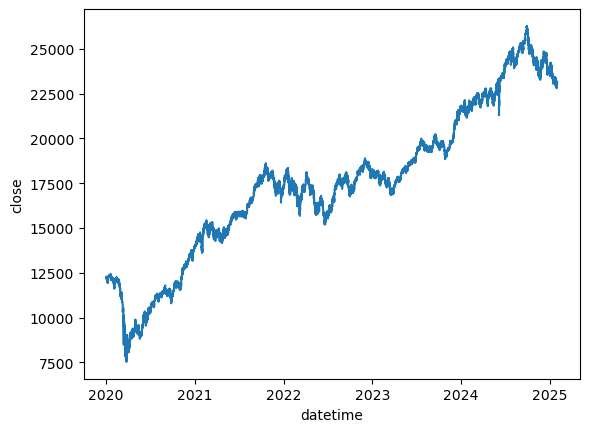

In [134]:
import seaborn as sns
nifty['datetime'] = pd.to_datetime(nifty['datetime'])
## Cleansing nifty data
# nifty.drop(columns = 'count',inplace=True)
print(nifty.shape)
nifty.drop_duplicates(inplace=True)
print(nifty.shape)
nifty = nifty.groupby('datetime',as_index=False).first()
print(nifty.shape)
sns.lineplot(data = nifty, x = 'datetime', y = 'close')

In [96]:
nifty2021 = download_equity_data("2021-01-01T07:00:00.000Z","2021-12-31T07:00:00.000Z","NIFTY",#  frequency = "1day"
                             )

2021-01-01 00:00:00
2021-02-01 00:00:00
2021-03-01 00:00:00
2021-04-01 00:00:00
2021-06-01 00:00:00
2021-07-01 00:00:00
2021-09-01 00:00:00
2021-10-01 00:00:00
2021-11-01 00:00:00
2021-12-01 00:00:00


In [128]:
pd.DataFrame(breeze.get_historical_data_v2(interval = '1minute',
                                        from_date = '2020-08-24T07:00:00.000Z',#pd.to_datetime(start),
                                        to_date = '2020-08-24T23:00:00.000Z',#pd.to_datetime(end),
                                        stock_code = "NIFTY",
                                        exchange_code = "NSE",
                                        product_type = "equity",
                                        right="others",
                                        strike_price="0")['Success']).sort_values('datetime')


,close,datetime,exchange_code,high,low,open,stock_code,volume
0,11412.00,2020-08-24 09:07:00,NSE,11412.00,11412.00,11412.00,NIFTY,0
1,11441.40,2020-08-24 09:15:00,NSE,11441.40,11410.65,11410.65,NIFTY,0
2,11436.20,2020-08-24 09:16:00,NSE,11442.70,11434.00,11439.50,NIFTY,0
3,11435.50,2020-08-24 09:17:00,NSE,11439.45,11433.10,11435.00,NIFTY,0
4,11438.45,2020-08-24 09:18:00,NSE,11440.80,11434.50,11436.00,NIFTY,0
...,...,...,...,...,...,...,...,...
371,11465.25,2020-08-24 15:25:00,NSE,11466.05,11463.25,11464.60,NIFTY,0
372,11468.70,2020-08-24 15:26:00,NSE,11468.75,11465.35,11465.45,NIFTY,0
373,11472.35,2020-08-24 15:27:00,NSE,11472.35,11468.55,11468.55,NIFTY,0
374,11471.40,2020-08-24 15:28:00,NSE,11472.65,11470.45,11472.25,NIFTY,0


In [120]:
# nifty2021['datetime'] = pd.to_datetime(nifty2021['datetime'])
nifty2021.loc[nifty2021['datetime'].dt.date == pd.Timestamp("2021-08-24").date()]

,datetime,stock_code,exchange_code,product_type,expiry_date,right,strike_price,open,high,low,close,volume,open_interest,count
506,2021-08-24 07:54:00,NIFTY,NSE,None,None,None,None,16496.45,16496.45,16496.45,16496.45,,None,506
507,2021-08-24 07:55:00,NIFTY,NSE,None,None,None,None,16496.45,16496.45,16496.45,16496.45,,None,507
508,2021-08-24 07:56:00,NIFTY,NSE,None,None,None,None,16496.45,16496.45,16496.45,16496.45,,None,508
509,2021-08-24 07:57:00,NIFTY,NSE,None,None,None,None,16496.45,16496.45,16496.45,16496.45,,None,509
510,2021-08-24 07:58:00,NIFTY,NSE,None,None,None,None,16496.45,16496.45,16496.45,16496.45,,None,510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,2021-08-24 15:58:00,NIFTY,NSE,None,None,None,None,16624.6,16624.6,16624.6,16624.6,,None,484
485,2021-08-24 15:59:00,NIFTY,NSE,None,None,None,None,16624.6,16624.6,16624.6,16624.6,,None,485
486,2021-08-24 16:00:00,NIFTY,NSE,None,None,None,None,16624.6,16624.6,16624.6,16624.6,,None,486
487,2021-08-24 16:01:00,NIFTY,NSE,None,None,None,None,16624.6,16624.6,16624.6,16624.6,,None,487


In [123]:
nifty2021.loc[nifty2021['datetime'] == pd.to_datetime("2021-08-24")]

,datetime,stock_code,exchange_code,product_type,expiry_date,right,strike_price,open,high,low,close,volume,open_interest,count


In [124]:
pd.Timestamp("2021-08-24").date(), pd.to_datetime("2021-08-24").date()

(datetime.date(2021, 8, 24), datetime.date(2021, 8, 24))

In [119]:
nifty2021.dtypes

datetime         datetime64[ns]
stock_code               object
exchange_code            object
product_type             object
expiry_date              object
right                    object
strike_price             object
open                     object
high                     object
low                      object
close                    object
volume                   object
open_interest            object
count                     int64
dtype: object

In [135]:
nifty.to_csv("Data/Nifty_01Jan2020_29Jan2025.csv",index = False)

In [6]:
futures.to_csv('Data/Nifty_Futures_01Jan2020_29Jan25.csv',index=False)

In [20]:
futures['expiry_date'].value_counts()

expiry_date
27-JAN-22    35588
24-FEB-22    29745
31-OCT-24    24649
31-AUG-23    23804
28-JUL-22    23361
             ...  
30-APR-20    19384
27-FEB-20    15075
27-FEB-25    13943
30-JAN-20     8261
27-MAR-25     7396
Name: count, Length: 63, dtype: int64

In [164]:
nifty = pd.DataFrame(breeze.get_historical_data_v2(interval = '1minute',#'1day',
                                    from_date = "2020-01-01T07:00:00.000Z",#pd.to_datetime(start),
                                    to_date = "2024-10-01T07:00:00.000Z",#pd.to_datetime(end),
                                    stock_code = "NIFTY",
                                    exchange_code = "NSE",
                                    product_type = "cash"
                                               )['Success'])

In [165]:
nifty

,close,datetime,exchange_code,high,low,open,stock_code,volume
0,26061.60,2024-09-26 11:32:00,NSE,26068.45,26060.50,26063.25,NIFTY,0
1,26062.50,2024-09-26 11:33:00,NSE,26066.80,26059.15,26062.35,NIFTY,0
2,26065.90,2024-09-26 11:34:00,NSE,26068.30,26063.40,26064.40,NIFTY,0
3,26069.60,2024-09-26 11:35:00,NSE,26071.55,26065.80,26066.25,NIFTY,0
4,26067.55,2024-09-26 11:36:00,NSE,26070.90,26067.15,26070.45,NIFTY,0
...,...,...,...,...,...,...,...,...
995,25802.70,2024-09-30 15:25:00,NSE,25810.70,25802.70,25805.45,NIFTY,0
996,25801.35,2024-09-30 15:26:00,NSE,25808.25,25799.55,25802.15,NIFTY,0
997,25800.35,2024-09-30 15:27:00,NSE,25804.25,25794.35,25801.85,NIFTY,0
998,25818.40,2024-09-30 15:28:00,NSE,25819.95,25800.95,25800.95,NIFTY,0


In [156]:
itc = pd.DataFrame(breeze.get_historical_data(interval="1minute",
                            from_date= "2022-08-15T07:00:00.000Z",
                            to_date= "2022-08-20T07:00:00.000Z",
                            stock_code="ITC",
                            exchange_code="NSE",
                            product_type="cash")['Success'])

In [157]:
itc

,datetime,stock_code,exchange_code,product_type,expiry_date,right,strike_price,open,high,low,close,volume,open_interest,count
0,2022-08-16 09:07:00,ITC,NSE,None,None,None,None,308.55,308.55,308.55,308.55,10,None,0
1,2022-08-16 09:15:00,ITC,NSE,None,None,None,None,309,309.7,309,309.7,656,None,1
2,2022-08-16 09:16:00,ITC,NSE,None,None,None,None,309.4,309.7,309.3,309.6,203,None,2
3,2022-08-16 09:17:00,ITC,NSE,None,None,None,None,309.3,309.3,308.65,308.7,260,None,3
4,2022-08-16 09:18:00,ITC,NSE,None,None,None,None,308.85,309.15,308.75,309,1166,None,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,2022-08-19 15:55:00,ITC,NSE,None,None,None,None,312,312,312,312,890,None,1581
1582,2022-08-19 15:57:00,ITC,NSE,None,None,None,None,312,312,312,312,78,None,1582
1583,2022-08-19 15:58:00,ITC,NSE,None,None,None,None,312,312,312,312,251,None,1583
1584,2022-08-19 15:59:00,ITC,NSE,None,None,None,None,311.9,311.9,311.9,311.9,175,None,1584


In [132]:
datetime.date(2020, 1, 30).strftime("%Y-%m-%d") + 'T07:00:00.000Z'

'2020-01-30T07:00:00.000Z'

In [136]:
exp_count = futures.groupby('datetime')['expiry_date'].nunique()


datetime
2020-01-01 09:15:00    3
2020-01-01 09:16:00    3
2020-01-01 09:18:00    3
2020-01-01 09:19:00    3
2020-01-01 09:20:00    3
                      ..
2024-09-27 15:25:00    3
2024-09-27 15:26:00    3
2024-09-27 15:27:00    3
2024-09-27 15:28:00    3
2024-09-27 15:29:00    3
Name: expiry_date, Length: 361997, dtype: int64

In [137]:
exp_count.value_counts()

expiry_date
3    361997
2     74410
1      3851
Name: count, dtype: int64

In [138]:
exp_count.loc[exp_count <3]

datetime
2020-01-01 09:17:00    2
2020-01-01 09:21:00    2
2020-01-01 09:22:00    2
2020-01-01 09:24:00    2
2020-01-01 09:27:00    2
                      ..
2024-09-27 13:34:00    2
2024-09-27 13:35:00    2
2024-09-27 14:03:00    2
2024-09-27 14:23:00    2
2024-09-27 14:27:00    2
Name: expiry_date, Length: 78261, dtype: int64

In [140]:
futures.loc[pd.to_datetime(futures['datetime']).dt.date == datetime.date(2020,1,1)]

,datetime,stock_code,exchange_code,product_type,expiry_date,right,strike_price,open,high,low,close,volume,open_interest,count
0,2020-01-01 09:15:00,NIFTY,NFO,Futures,30-JAN-20,Others,0,12253.9502,12266.75,12252.7002,12265.2998,107927,12263025,0
1,2020-01-01 09:16:00,NIFTY,NFO,Futures,30-JAN-20,Others,0,12265.2998,12265.5,12256.4004,12256.5996,50250,12263025,1
2,2020-01-01 09:17:00,NIFTY,NFO,Futures,30-JAN-20,Others,0,12256.9502,12257,12255,12255,48975,12250950,2
3,2020-01-01 09:18:00,NIFTY,NFO,Futures,30-JAN-20,Others,0,12255,12258.75,12252.2002,12258.75,34200,12250950,3
4,2020-01-01 09:19:00,NIFTY,NFO,Futures,30-JAN-20,Others,0,12258.7998,12264.7998,12258.7002,12262.4502,34875,12250950,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2020-01-01 15:24:00,NIFTY,NFO,Futures,26-MAR-20,Others,0,12332.2002,12332.2002,12332.0996,12332.0996,225,76875,87
88,2020-01-01 15:25:00,NIFTY,NFO,Futures,26-MAR-20,Others,0,12333.5,12334.4502,12333.5,12333.5498,225,76350,88
89,2020-01-01 15:26:00,NIFTY,NFO,Futures,26-MAR-20,Others,0,12336,12336,12336,12336,450,76350,89
90,2020-01-01 15:27:00,NIFTY,NFO,Futures,26-MAR-20,Others,0,12333.4502,12333.4502,12332.7002,12332.7002,750,76050,90


In [45]:
start_date > pd.to_datetime('2024-09-15')

TypeError: Cannot compare Timestamp with datetime.date. Use ts == pd.Timestamp(date) or ts.date() == date instead.

###### working_days_df.index

In [7]:
def last_thursday(year, month):
    last_day = calendar.monthrange(year, month)[1]
    last_date = datetime.date(year, month, last_day)
    last_thursday = last_date - datetime.timedelta(days=(last_date.weekday() - 3) % 7)
    return last_thursday
last_thursday(2024,9)

datetime.date(2024, 9, 26)

In [26]:
pd.to_datetime(working_days.schedule("2024-01-01","2024-01-31")['market_open'])

2024-01-01   2024-01-01 03:45:00+00:00
2024-01-02   2024-01-02 03:45:00+00:00
2024-01-03   2024-01-03 03:45:00+00:00
2024-01-04   2024-01-04 03:45:00+00:00
2024-01-05   2024-01-05 03:45:00+00:00
2024-01-08   2024-01-08 03:45:00+00:00
2024-01-09   2024-01-09 03:45:00+00:00
2024-01-10   2024-01-10 03:45:00+00:00
2024-01-11   2024-01-11 03:45:00+00:00
2024-01-12   2024-01-12 03:45:00+00:00
2024-01-15   2024-01-15 03:45:00+00:00
2024-01-16   2024-01-16 03:45:00+00:00
2024-01-17   2024-01-17 03:45:00+00:00
2024-01-18   2024-01-18 03:45:00+00:00
2024-01-19   2024-01-19 03:45:00+00:00
2024-01-22   2024-01-22 03:45:00+00:00
2024-01-23   2024-01-23 03:45:00+00:00
2024-01-24   2024-01-24 03:45:00+00:00
2024-01-25   2024-01-25 03:45:00+00:00
2024-01-29   2024-01-29 03:45:00+00:00
2024-01-30   2024-01-30 03:45:00+00:00
2024-01-31   2024-01-31 03:45:00+00:00
Name: market_open, dtype: datetime64[ns, UTC]

In [27]:
working_days.schedule("2024-01-01","2024-01-31")

,market_open,market_close
2024-01-01,2024-01-01 03:45:00+00:00,2024-01-01 10:00:00+00:00
2024-01-02,2024-01-02 03:45:00+00:00,2024-01-02 10:00:00+00:00
2024-01-03,2024-01-03 03:45:00+00:00,2024-01-03 10:00:00+00:00
2024-01-04,2024-01-04 03:45:00+00:00,2024-01-04 10:00:00+00:00
2024-01-05,2024-01-05 03:45:00+00:00,2024-01-05 10:00:00+00:00
2024-01-08,2024-01-08 03:45:00+00:00,2024-01-08 10:00:00+00:00
2024-01-09,2024-01-09 03:45:00+00:00,2024-01-09 10:00:00+00:00
2024-01-10,2024-01-10 03:45:00+00:00,2024-01-10 10:00:00+00:00
2024-01-11,2024-01-11 03:45:00+00:00,2024-01-11 10:00:00+00:00
2024-01-12,2024-01-12 03:45:00+00:00,2024-01-12 10:00:00+00:00
